In [1]:
import os

from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import torch
from torch.autograd import Variable
torch.manual_seed(0)

from GCommandsPytorch.gcommand_loader import GCommandLoader
from GCommandsPytorch.model import LeNet
from GCommandsPytorch.train import train

So, I have the `audio` folder and it contains all the wav-files. I need to split it into three separate folders (`train`, `test` and `valid`) according to `testing_list.txt` and `validation_list.txt`. In order to do that I'll make three copies of the `audio` folder and will name them as target folders and then just will walk through these folders and remove extra files.

In [2]:
with open('data/testing_list.txt') as f:
    test_filenames = [line[:-1] for line in f]
    
with open('data/validation_list.txt') as f:
    valid_filenames = [line[:-1] for line in f]

In [3]:
train_classes = {}
test_classes = {}
valid_classes = {}

for name in ['train', 'test', 'valid']:
    for folder in os.listdir('data/' + name):
        for file in os.listdir('data/{name}/{folder}'.format(name=name, folder=folder)):
            filename = folder + '/' + file
            if name == 'train' and filename not in test_filenames + valid_filenames:
                train_classes[folder] = train_classes.get(folder, 0) + 1
            elif name == 'test' and filename in test_filenames:
                test_classes[folder] = test_classes.get(folder, 0) + 1
            elif name == 'valid' and filename in valid_filenames:
                valid_classes[folder] = valid_classes.get(folder, 0) + 1
            else:
                os.remove('data/' + name + '/' + filename)

In [4]:
for clazz in train_classes:
    print('Class: {},\tnum in train: {},\tnum in valid: {},\tnum in test: {}'.format(
        clazz.upper(), train_classes[clazz], valid_classes[clazz], test_classes[clazz]))

Class: RIGHT,	num in train: 1852,	num in valid: 256,	num in test: 259
Class: EIGHT,	num in train: 1852,	num in valid: 243,	num in test: 257
Class: CAT,	num in train: 1399,	num in valid: 168,	num in test: 166
Class: TREE,	num in train: 1374,	num in valid: 166,	num in test: 193
Class: BED,	num in train: 1340,	num in valid: 197,	num in test: 176
Class: HAPPY,	num in train: 1373,	num in valid: 189,	num in test: 180
Class: GO,	num in train: 1861,	num in valid: 260,	num in test: 251
Class: DOG,	num in train: 1396,	num in valid: 170,	num in test: 180
Class: NO,	num in train: 1853,	num in valid: 270,	num in test: 252
Class: WOW,	num in train: 1414,	num in valid: 166,	num in test: 165
Class: NINE,	num in train: 1875,	num in valid: 230,	num in test: 259
Class: LEFT,	num in train: 1839,	num in valid: 247,	num in test: 267
Class: STOP,	num in train: 1885,	num in valid: 246,	num in test: 249
Class: THREE,	num in train: 1841,	num in valid: 248,	num in test: 267
Class: SHEILA,	num in train: 1372,	num

In [3]:
TRAIN_PATH = 'data/train'
VALID_PATH = 'data/valid'
TEST_PATH = 'data/test'

BATCH_SIZE = 20
LEARNING_RATE = 0.001
MOMENTUM = 0.9
NUM_EPOCH = 10

In [4]:
train_dataset = GCommandLoader(TRAIN_PATH)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

valid_dataset = GCommandLoader(VALID_PATH)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=None)

test_dataset = GCommandLoader(TEST_PATH)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=None)

In [13]:
model = LeNet()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM)

for epoch in range(1, NUM_EPOCH + 1):
    train(loader=train_loader, model=model, optimizer=optimizer, epoch=epoch, cuda=False, log_interval=100)
    if epoch % 3 == 0:
        torch.save(model, 'checkpoint/model.t7')
        
torch.save(model, 'checkpoint/model.t7')

/Users/anastasia/Projects/speech-recognition-hw/GCommandsPytorch/model.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 2 [0/51088 (0%)]	Loss: 1.274917
Train Epoch: 2 [2000/51088 (4%)]	Loss: 0.922466
Train Epoch: 2 [4000/51088 (8%)]	Loss: 1.012262
Train Epoch: 2 [6000/51088 (12%)]	Loss: 0.558375
Train Epoch: 2 [8000/51088 (16%)]	Loss: 1.256439
Train Epoch: 2 [10000/51088 (20%)]	Loss: 0.865107
Train Epoch: 2 [12000/51088 (23%)]	Loss: 1.007296
Train Epoch: 2 [14000/51088 (27%)]	Loss: 1.044105
Train Epoch: 2 [16000/51088 (31%)]	Loss: 0.973985
Train Epoch: 2 [18000/51088 (35%)]	Loss: 0.826734
Train Epoch: 2 [20000/51088 (39%)]	Loss: 0.914152
Train Epoch: 2 [22000/51088 (43%)]	Loss: 0.651395
Train Epoch: 2 [24000/51088 (47%)]	Loss: 0.962006
Train Epoch: 2 [26000/51088 (51%)]	Loss: 1.339655
Train Epoch: 2 [28000/51088 (55%)]	Loss: 1.892213
Train Epoch: 2 [30000/51088 (59%)]	Loss: 1.223322
Train Epoch: 2 [32000/51088 (63%)]	Loss: 0.809372
Train Epoch: 2 [34000/51088 (67%)]	Loss: 1.039867
Train Epoch: 2 [36000/51088 (70%)]	Loss: 0.826424
Train Epoch: 2 [38000/51088 (74%)]	Loss: 1.806407
Train Epoch

Train Epoch: 8 [20000/51088 (39%)]	Loss: 0.776112
Train Epoch: 8 [22000/51088 (43%)]	Loss: 1.093697
Train Epoch: 8 [24000/51088 (47%)]	Loss: 1.325303
Train Epoch: 8 [26000/51088 (51%)]	Loss: 1.540132
Train Epoch: 8 [28000/51088 (55%)]	Loss: 1.016502
Train Epoch: 8 [30000/51088 (59%)]	Loss: 0.946229
Train Epoch: 8 [32000/51088 (63%)]	Loss: 1.104640
Train Epoch: 8 [34000/51088 (67%)]	Loss: 0.900031
Train Epoch: 8 [36000/51088 (70%)]	Loss: 1.163645
Train Epoch: 8 [38000/51088 (74%)]	Loss: 0.833349
Train Epoch: 8 [40000/51088 (78%)]	Loss: 0.967175
Train Epoch: 8 [42000/51088 (82%)]	Loss: 1.011443
Train Epoch: 8 [44000/51088 (86%)]	Loss: 1.990660
Train Epoch: 8 [46000/51088 (90%)]	Loss: 0.989326
Train Epoch: 8 [48000/51088 (94%)]	Loss: 1.407967
Train Epoch: 8 [50000/51088 (98%)]	Loss: 1.526264
Train Epoch: 9 [0/51088 (0%)]	Loss: 1.172896
Train Epoch: 9 [2000/51088 (4%)]	Loss: 1.033649
Train Epoch: 9 [4000/51088 (8%)]	Loss: 1.462296
Train Epoch: 9 [6000/51088 (12%)]	Loss: 1.403246
Train Epoc

In [2]:
model = torch.load('checkpoint/model.t7')
model.eval()

LeNet(
  (conv1): Conv2d (1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d (20, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5)
  (fc1): Linear(in_features=16280, out_features=1000)
  (fc2): Linear(in_features=1000, out_features=30)
)

In [12]:
y_true = []
y_pred = []

for features, labels in tqdm(test_loader):
    features, labels = Variable(features, volatile=True), Variable(labels)
    y_true += labels.data.tolist()
    
    output = model(features)
    y_pred += output.data.max(1)[1].tolist()

  0%|          | 0/342 [00:00<?, ?it/s]/Users/anastasia/Projects/speech-recognition-hw/GCommandsPytorch/model.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
100%|██████████| 342/342 [02:03<00:00,  2.76it/s]


In [13]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)

In [17]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [18]:
accuracy_score(y_true, y_pred)

0.7360643745427944

In [21]:
f1_score(y_true, y_pred, average='macro')

0.7367793353949003

In [22]:
cnf_matrix = confusion_matrix(y_true, y_pred)

In [26]:
classes = np.array([folder for folder in os.listdir('data/train')])

In [28]:
classes = np.sort(classes)

In [30]:
import itertools

In [31]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

Text(0.5,95.7802,'Predicted label')

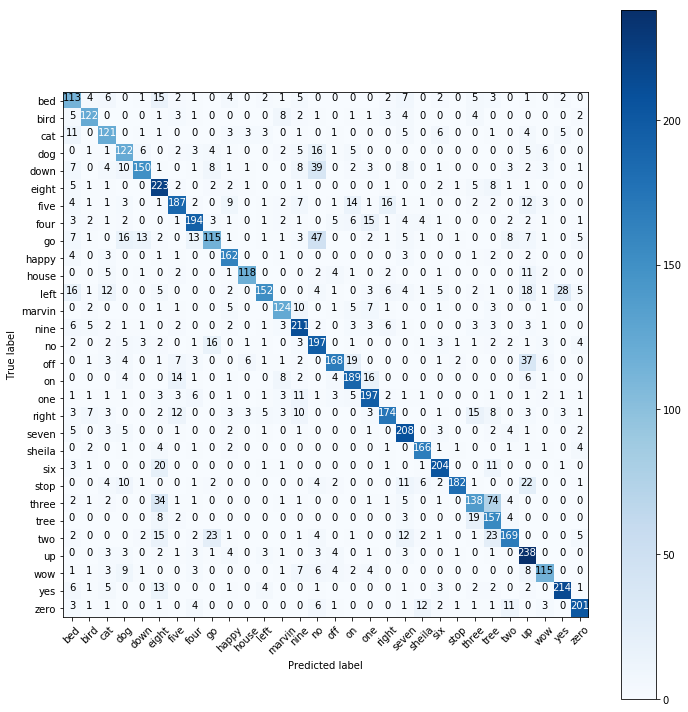

In [33]:
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(30)
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = cnf_matrix.max() / 2.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, format(cnf_matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')